In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-06,1,2020-08,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-10,2,2020-04,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-04,3,2021-05,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-03,4,2020-07,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-07,5,2021-06,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-02,1614,2013-07,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1615,2013-07,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1616,2013-07,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-11,1617,2013-06,WA,Northbridge


# Filter Outliers

To git rid of outliers, we need to filter:

    * Properties sold before 2019
    * landsize over 2000 sqm
    * carspace,bedroom over 6
    * Properties price over 3M

In [4]:
df['sold_date']= df['sold_date'].astype('datetime64[ns]')
df['sold_date'] = df['sold_date'].dt.strftime('%Y')
df['sold_date'] = df['sold_date'].astype('int')
df['rent_date']= df['rent_date'].astype('datetime64[ns]')
df['rent_date'] = df['rent_date'].dt.strftime('%Y')
df['rent_date'] = df['rent_date'].astype('int')

In [5]:
df.dtypes

address           object
agent             object
bathrooms          int64
bedrooms           int64
building_size      int64
built_date         int64
car_space          int64
full_address      object
land_size          int64
lat              float64
lng              float64
postcode           int64
price              int64
property_type     object
rent               int64
rent_date          int32
sale_id            int64
sold_date          int32
state             object
suburb            object
dtype: object

In [6]:
# After2019_df = df[(df['sold_date']>2019)]
# After2019_df

In [7]:
Less2000sqm_df = df[(df['land_size']<2000)]
Less2000sqm_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [8]:
carspaceLessThan7_df = Less2000sqm_df[(Less2000sqm_df['car_space']<7)]
carspaceLessThan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [9]:
BedroomsLessthan7_df = carspaceLessThan7_df[(carspaceLessThan7_df['bedrooms']<7)]
BedroomsLessthan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018,1614,2013,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900,1615,2013,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014,1616,2013,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011,1617,2013,WA,Northbridge


In [10]:
filtered_df = BedroomsLessthan7_df[(BedroomsLessthan7_df['price']<3000000)]

# Data Preporcessing

In [11]:
# filtered_df = df

In [12]:
#only getting landed properties for the machine learning
house = filtered_df[(filtered_df['property_type']=='House') | (filtered_df['property_type']=='Villa') | (filtered_df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018,2,2020,WA,Perth
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,115.859400,6000,821000,House,0,1900,6,2019,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018,7,2021,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018,8,2020,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013,9,2020,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,115.860120,6003,640000,House,450,2011,1593,2014,WA,Northbridge
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,115.854829,6003,440000,House,430,2010,1598,2014,WA,Northbridge
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,115.853643,6003,785000,Townhouse,600,2020,1599,2013,WA,Northbridge
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,115.855850,6003,1025000,House,0,1900,1609,2013,WA,Northbridge


In [13]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [14]:
house = pd.get_dummies(house, columns=["suburb"])
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,rent_date,sale_id,sold_date,state,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,2018,2,2020,WA,0,0,0,0,1,0
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,...,1900,6,2019,WA,0,0,0,0,1,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,2018,7,2021,WA,0,0,0,0,1,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,2018,8,2020,WA,0,0,0,0,1,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,2013,9,2020,WA,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,...,2011,1593,2014,WA,0,0,0,1,0,0
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,...,2010,1598,2014,WA,0,0,0,1,0,0
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,...,2020,1599,2013,WA,0,0,0,1,0,0
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,...,1900,1609,2013,WA,0,0,0,1,0,0


In [15]:
house = pd.get_dummies(house, columns=["property_type"])
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,state,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Townhouse,property_type_Villa
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,WA,0,0,0,0,1,0,0,1,0
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,...,WA,0,0,0,0,1,0,1,0,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,WA,0,0,0,0,1,0,1,0,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,WA,0,0,0,0,1,0,1,0,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,WA,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,...,WA,0,0,0,1,0,0,1,0,0
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,...,WA,0,0,0,1,0,0,1,0,0
1598,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,...,WA,0,0,0,1,0,0,0,1,0
1608,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,...,WA,0,0,0,1,0,0,1,0,0


In [16]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,26] = 1
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,13]= 2
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,13] = 3
    
# #     house.iloc[i,15] = int(house.iloc[i,15].split('-')[0])
# #     if house.iloc[i,15]== 1900:
# #         house.iloc[i,15] = 0
# house

In [17]:
# house['median_income'] = ''

In [18]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,19] =='Perth':
#         house.iloc[i,20] = 1750
#     elif house.iloc[i,19] =='Crawley':
#         house.iloc[i,20]= 1145
#     elif house.iloc[i,19] =='Nedlands':
#         house.iloc[i,20] = 2217
#     elif house.iloc[i,19] =='Northbridge':
#         house.iloc[i,20] = 1385
#         elif house.iloc[i,19] =='Northbridge':
#         house.iloc[i,20] = 1385

In [ ]:
# house['perth'] = ''
# house['east_perth'] = ''
# house['west_perth'] = ''
# house['northbridge'] = ''
# house['crawley'] = ''
# house['nedlands'] = ''
# house['Villa'] = ''
# house['Townhouse'] = ''
# house['House'] = ''

In [19]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,19] =='Perth':
#         house.iloc[i,20] = 1
#         house.iloc[i,21:26] = 0
#     elif house.iloc[i,19] =='East Perth':
#         house.iloc[i,21] = 1
#         house.iloc[i,20] = 0
#         house.iloc[i,22:26] = 0
#     elif house.iloc[i,19] =='West Perth':
#         house.iloc[i,22] = 1
#         house.iloc[i,20:22] = 0
#         house.iloc[i,23:26] = 0
#     elif house.iloc[i,19] =='Northbridge':
#         house.iloc[i,23] = 1
#         house.iloc[i,20:23] = 0
#         house.iloc[i,24:26] = 0
#     elif house.iloc[i,19] =='Crawley':
#         house.iloc[i,24] = 1
#         house.iloc[i,20:24] = 0
#         house.iloc[i,25] = 0
#     elif house.iloc[i,19] =='Nedlands':
#         house.iloc[i,25] = 1
#         house.iloc[i,20:25] = 0
        
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,26] = 1
#         house.iloc[i,27:29] = 0
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,27]= 1
#         house.iloc[i,26] = 0
#         house.iloc[i,28] = 0
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,28] = 1
#         house.iloc[i,26:28] = 0

# house

In [89]:
# Assign the data to X and y
X = house.drop("price",axis=1)
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(474, 26) (474, 1)


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [135]:
X_train.shape,X_test.shape

((331, 26), (143, 26))

<AxesSubplot:>

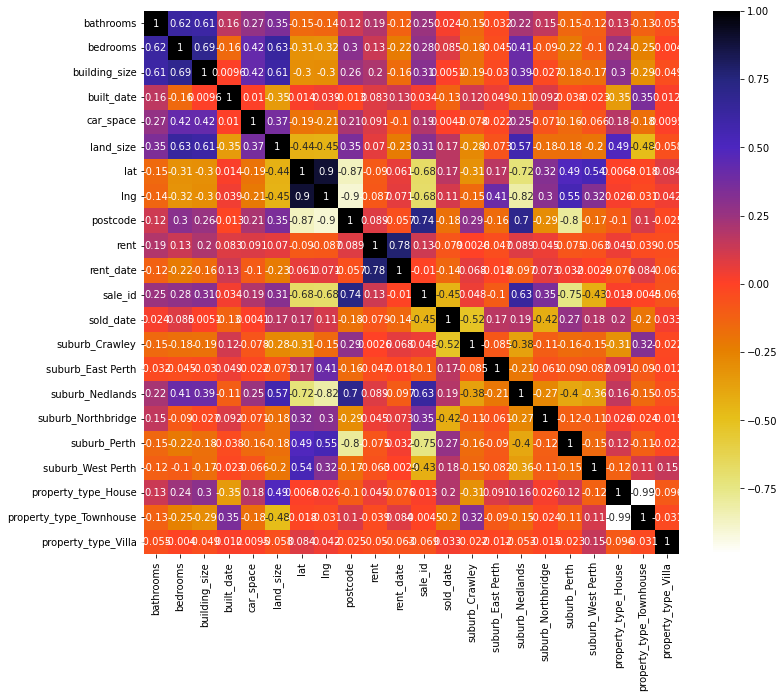

In [136]:
import seaborn  as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap= plt.cm.CMRmap_r)

In [137]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [138]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

2

In [139]:
corr_features

{'postcode', 'property_type_Townhouse'}

In [140]:
X_train = X_train.drop(corr_features, axis=1)

In [141]:
X_train.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'rent', 'rent_date', 'sale_id', 'sold_date', 'state', 'suburb_Crawley',
       'suburb_East Perth', 'suburb_Nedlands', 'suburb_Northbridge',
       'suburb_Perth', 'suburb_West Perth', 'property_type_House',
       'property_type_Villa'],
      dtype='object')

In [152]:
X_train = X_train[['bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'land_size', 'lat', 'lng', 'rent', 'rent_date', 'sold_date', 'suburb_Crawley', 'suburb_East Perth', 'suburb_Nedlands',
       'suburb_Northbridge', 'suburb_Perth', 'suburb_West Perth',
       'property_type_House', 'property_type_Villa']]
X_train

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,rent,rent_date,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa
1198,3,4,322,2012,2,683,-31.990400,115.813842,2300,2017,2020,0,0,1,0,0,0,1,0
1126,2,3,186,1999,4,312,-31.978733,115.802033,900,2013,2021,0,0,1,0,0,0,1,0
900,1,2,100,1978,2,95,-31.985938,115.815321,0,1900,2020,1,0,0,0,0,0,0,0
1108,1,3,163,1969,2,301,-31.985009,115.817853,500,2019,2013,1,0,0,0,0,0,1,0
1221,3,4,245,1939,1,1153,-31.988496,115.802310,0,1900,2020,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2,3,118,1999,2,164,-31.973727,115.813865,595,2010,2019,0,0,1,0,0,0,0,0
1189,2,2,131,2002,2,158,-31.988411,115.814939,0,1900,2020,0,0,1,0,0,0,0,0
536,1,1,74,2008,1,122,-31.937335,115.848270,375,2018,2019,0,0,0,0,0,1,1,0
1106,1,2,117,2000,2,208,-31.985478,115.815436,0,1900,2013,1,0,0,0,0,0,0,0


In [153]:
X_test = X_test[['bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'land_size', 'lat', 'lng', 'rent', 'rent_date', 'sold_date', 'suburb_Crawley', 'suburb_East Perth', 'suburb_Nedlands',
       'suburb_Northbridge', 'suburb_Perth', 'suburb_West Perth',
       'property_type_House', 'property_type_Villa']]
X_test

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,rent,rent_date,sold_date,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa
1235,3,2,333,2016,2,722,-31.988980,115.811993,0,1900,2019,0,0,1,0,0,0,1,0
882,2,3,130,2000,2,159,-31.985478,115.815436,670,2021,2021,1,0,0,0,0,0,1,0
623,3,3,166,2001,2,114,-31.949820,115.878750,0,1900,2021,0,1,0,0,0,0,0,0
45,1,2,131,1930,2,409,-31.941927,115.859304,0,1900,2020,0,0,0,0,1,0,1,0
1330,2,4,261,1945,2,1019,-31.988322,115.795100,0,1900,2018,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3,3,245,2000,2,161,-31.949882,115.879849,1000,2016,2020,0,1,0,0,0,0,1,0
1298,1,2,133,1935,2,999,-31.987361,115.802957,520,2020,2018,0,0,1,0,0,0,1,0
523,2,3,120,1992,1,206,-31.936765,115.855573,0,1900,2019,0,0,0,0,0,1,0,0
1227,2,4,188,1981,2,696,-31.978992,115.793436,0,1900,2019,0,0,1,0,0,0,1,0


In [154]:
# house.sort_values(by = ['price'], ascending=False)

In [155]:
# # Assign the data to X and y
# X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "postcode"]]
# y = house["price"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [156]:
# # Assign the data to X and y
# X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "perth", "west_perth", "east_perth", "northbridge", "crawley", "nedlands"]]
# y = house["price"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [157]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [158]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [159]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [160]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [161]:
# #evaluate the model (intercept and slope)
# print(model.intercept_)
# print(model.coef_)

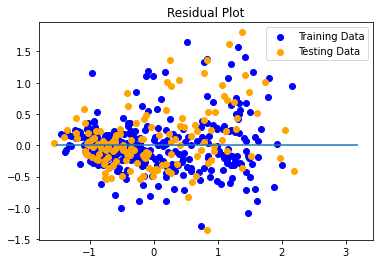

In [162]:
# Make predictions using a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [163]:
#compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,rent,rent_date,...,suburb_Crawley,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa,Actual,Linear_Regression_Predicted
1235,3,2,333,2016,2,722,-31.988980,115.811993,0,1900,...,0,0,1,0,0,0,1,0,2240000,1.562119e+06
882,2,3,130,2000,2,159,-31.985478,115.815436,670,2021,...,1,0,0,0,0,0,1,0,860000,1.091831e+06
623,3,3,166,2001,2,114,-31.949820,115.878750,0,1900,...,0,1,0,0,0,0,0,0,952000,7.970405e+05
45,1,2,131,1930,2,409,-31.941927,115.859304,0,1900,...,0,0,0,0,1,0,1,0,790000,8.842158e+05
1330,2,4,261,1945,2,1019,-31.988322,115.795100,0,1900,...,0,0,1,0,0,0,1,0,2200000,1.774322e+06
1384,2,3,250,2005,2,246,-31.945229,115.857610,0,1900,...,0,0,0,1,0,0,1,0,1250000,1.079213e+06
1291,1,2,330,1936,2,1012,-31.981774,115.800461,0,1900,...,0,0,1,0,0,0,1,0,2400000,1.594809e+06
195,2,3,138,2002,2,212,-31.944275,115.863843,0,1900,...,0,0,0,0,1,0,0,0,765000,7.293649e+05
670,2,3,165,1999,2,160,-31.951210,115.879407,700,2015,...,0,1,0,0,0,0,1,0,1235000,8.710248e+05
1153,3,4,395,2012,1,1013,-31.987555,115.800924,500,2010,...,0,0,1,0,0,0,1,0,2750000,1.795542e+06


In [164]:
# Fit the model to the training data and calculate the scores for the training and testing data

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8254733512506633
Testing Score: 0.797502309170236


In [165]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2309937330810614, R2: 0.797502309170236


In [ ]:
#test
# suburb needs to be categorical
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results


# LASSO model

In [47]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions) #error to a model (closer to 0 the better)
r2 = lasso.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11357999250532341, R2: 0.8596470825740132


In [48]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

lasso_grid_result = lasso_grid.fit(X_train_scaled, y_train_scaled)

# lasso_grid_predictions = lasso_grid_model(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, lasso_grid_predictions) #error to a model (closer to 0 the better)
# r2 = lasso_grid_model.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7701067283725321
Best Params:  {'alpha': 0.001}


In [49]:
best_lasso = Lasso(alpha=0.001).fit(X_train_scaled, y_train_scaled)

best_lasso_predictions = best_lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_lasso_predictions)
r2 = best_lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11450046069356608, R2: 0.8585096428474556


In [50]:
df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))
df1.head(10)

<ipython-input-50-96dcefbde04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))


,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,postcode,rent,...,suburb_East Perth,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa,Actual,Linear_Regression_Predicted,Lasso_Predicted
1514,4,4,375,2007,2,243,-31.944534,115.856220,6003,1500,...,0,0,1,0,0,0,0,1250000,1.367146e+06,1.364535e+06
1194,3,4,377,2007,2,1012,-31.985916,115.800461,6009,2000,...,0,1,0,0,0,1,0,2100000,2.367552e+06,2.364303e+06
866,2,3,105,1990,2,168,-31.955768,115.874568,6004,390,...,1,0,0,0,0,0,0,445000,5.864811e+05,5.998004e+05
1541,1,2,102,1996,1,160,-31.945809,115.854368,6003,540,...,0,0,1,0,0,1,0,608000,4.935948e+05,4.941508e+05
1364,2,4,285,1955,2,1136,-31.987273,115.799167,6009,0,...,0,1,0,0,0,1,0,2125000,1.994504e+06,1.998824e+06
273,2,3,102,1920,2,357,-31.940572,115.859963,6000,0,...,0,0,0,1,0,1,0,820000,9.246591e+05,9.297534e+05
133,1,2,79,1918,0,378,-31.942054,115.864526,6000,0,...,0,0,0,1,0,1,0,615000,7.629349e+05,7.618887e+05
1265,2,3,230,2001,2,461,-31.982298,115.794522,6009,0,...,0,1,0,0,0,1,0,1350000,1.299811e+06,1.308167e+06
1355,2,3,134,1981,6,145,-31.981553,115.793680,6009,570,...,0,1,0,0,0,1,0,910000,9.159416e+05,9.307782e+05
418,2,2,98,1980,2,150,-31.937901,115.853921,6005,0,...,0,0,0,0,1,0,0,458000,5.499578e+05,5.504174e+05


# Ridge model

In [51]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11503733398138258, R2: 0.8578462185015736


In [52]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

ridge_grid_result = ridge_grid.fit(X_train_scaled, y_train_scaled)

# ridge_grid_predictions = ridge_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, ridge_grid_predictions) #error to a model (closer to 0 the better)
# r2 = ridge_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', ridge_grid_result.best_score_)
print('Best Params: ', ridge_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.770810865422462
Best Params:  {'alpha': 10}


In [55]:
best_ridge = Ridge(alpha=10).fit(X_train_scaled, y_train_scaled)

best_ridge_predictions = best_ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1110828444068104, R2: 0.86273285510437


In [56]:
df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))
df1.head(10)

<ipython-input-56-4ab57f1676a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))


,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,postcode,rent,...,suburb_Nedlands,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted
1514,4,4,375,2007,2,243,-31.944534,115.856220,6003,1500,...,0,1,0,0,0,0,1250000,1.367146e+06,1.364535e+06,1.359829e+06
1194,3,4,377,2007,2,1012,-31.985916,115.800461,6009,2000,...,1,0,0,0,1,0,2100000,2.367552e+06,2.364303e+06,2.316229e+06
866,2,3,105,1990,2,168,-31.955768,115.874568,6004,390,...,0,0,0,0,0,0,445000,5.864811e+05,5.998004e+05,6.106275e+05
1541,1,2,102,1996,1,160,-31.945809,115.854368,6003,540,...,0,1,0,0,1,0,608000,4.935948e+05,4.941508e+05,4.929281e+05
1364,2,4,285,1955,2,1136,-31.987273,115.799167,6009,0,...,1,0,0,0,1,0,2125000,1.994504e+06,1.998824e+06,1.978812e+06
273,2,3,102,1920,2,357,-31.940572,115.859963,6000,0,...,0,0,1,0,1,0,820000,9.246591e+05,9.297534e+05,9.532899e+05
133,1,2,79,1918,0,378,-31.942054,115.864526,6000,0,...,0,0,1,0,1,0,615000,7.629349e+05,7.618887e+05,7.493960e+05
1265,2,3,230,2001,2,461,-31.982298,115.794522,6009,0,...,1,0,0,0,1,0,1350000,1.299811e+06,1.308167e+06,1.335790e+06
1355,2,3,134,1981,6,145,-31.981553,115.793680,6009,570,...,1,0,0,0,1,0,910000,9.159416e+05,9.307782e+05,1.003905e+06
418,2,2,98,1980,2,150,-31.937901,115.853921,6005,0,...,0,0,0,1,0,0,458000,5.499578e+05,5.504174e+05,5.427194e+05


# ElasticNet model

In [57]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

elas_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, elas_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11315687402609712, R2: 0.8601699379789691


In [58]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

elasticnet_grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

elasticnet_grid_result= elasticnet_grid.fit(X_train_scaled, y_train_scaled)

# elasticnet_grid_predictions = elasticnet_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, elasticnet_grid_predictions) #error to a model (closer to 0 the better)
# r2 = elasticnet_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', elasticnet_grid_result.best_score_)
print('Best Params: ', elasticnet_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7700834593480533
Best Params:  {'alpha': 0.001}


In [59]:
best_elasticnet = ElasticNet(alpha=0.001).fit(X_train_scaled, y_train_scaled)

best_elasticnet_predictions = best_elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_elasticnet_predictions)
r2 = best_elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11459275884406746, R2: 0.8583955882995538


In [60]:
df1['elasticnet_Predicted'] = y_scaler.inverse_transform(best_elasticnet.predict(X_test_scaled))
df1.head(10)

<ipython-input-60-30feeaf9fe4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elasticnet_Predicted'] = y_scaler.inverse_transform(best_elasticnet.predict(X_test_scaled))


,bathrooms,bedrooms,building_size,built_date,car_space,land_size,lat,lng,postcode,rent,...,suburb_Northbridge,suburb_Perth,suburb_West Perth,property_type_House,property_type_Villa,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted,elasticnet_Predicted
1514,4,4,375,2007,2,243,-31.944534,115.856220,6003,1500,...,1,0,0,0,0,1250000,1.367146e+06,1.364535e+06,1.359829e+06,1.365916e+06
1194,3,4,377,2007,2,1012,-31.985916,115.800461,6009,2000,...,0,0,0,1,0,2100000,2.367552e+06,2.364303e+06,2.316229e+06,2.365872e+06
866,2,3,105,1990,2,168,-31.955768,115.874568,6004,390,...,0,0,0,0,0,445000,5.864811e+05,5.998004e+05,6.106275e+05,5.952297e+05
1541,1,2,102,1996,1,160,-31.945809,115.854368,6003,540,...,1,0,0,1,0,608000,4.935948e+05,4.941508e+05,4.929281e+05,4.939706e+05
1364,2,4,285,1955,2,1136,-31.987273,115.799167,6009,0,...,0,0,0,1,0,2125000,1.994504e+06,1.998824e+06,1.978812e+06,1.996641e+06
273,2,3,102,1920,2,357,-31.940572,115.859963,6000,0,...,0,1,0,1,0,820000,9.246591e+05,9.297534e+05,9.532899e+05,9.277683e+05
133,1,2,79,1918,0,378,-31.942054,115.864526,6000,0,...,0,1,0,1,0,615000,7.629349e+05,7.618887e+05,7.493960e+05,7.627096e+05
1265,2,3,230,2001,2,461,-31.982298,115.794522,6009,0,...,0,0,0,1,0,1350000,1.299811e+06,1.308167e+06,1.335790e+06,1.303560e+06
1355,2,3,134,1981,6,145,-31.981553,115.793680,6009,570,...,0,0,0,1,0,910000,9.159416e+05,9.307782e+05,1.003905e+06,9.231084e+05
418,2,2,98,1980,2,150,-31.937901,115.853921,6005,0,...,0,0,1,0,0,458000,5.499578e+05,5.504174e+05,5.427194e+05,5.502875e+05


# Save the best Model

In [61]:
import joblib
joblib.dump(best_lasso, "best_model.pkl")

['best_model.pkl']

In [62]:
my_model = joblib.load("best_model.pkl")


In [63]:
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = my_model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results

ValueError: X has 12 features, but StandardScaler is expecting 20 features as input.

MAE: 0.26162743760137125
MSE: 0.11450046069356608
RMSE: 0.33837916705016885
VarScore: 0.8591439426886013


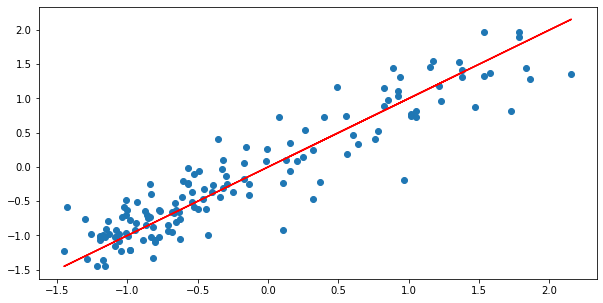

In [64]:
y_pred = my_model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')